In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
filename = "robert_frost.txt"
story_data = open(filename, 'r', encoding='utf-8').read()

In [3]:
story_data

"Two roads diverged in a yellow wood,\nAnd sorry I could not travel both\nAnd be one traveler, long I stood\nAnd looked down one as far as I could\nTo where it bent in the undergrowth;\n\nThen took the other, as just as fair,\nAnd having perhaps the better claim,\nBecause it was grassy and wanted wear;\nThough as for that the passing there\nHad worn them really about the same,\n\nAnd both that morning equally lay\nIn leaves no step had trodden black.\nOh, I kept the first for another day!\nYet knowing how way leads on to way,\nI doubted if I should ever come back.\n\nI shall be telling this with a sigh\nSomewhere ages and ages hence:\nTwo roads diverged in a wood, and I—\nI took the one less traveled by,\nAnd that has made all the difference.\n\nWhose woods these are I think I know.   \nHis house is in the village though;   \nHe will not see me stopping here   \nTo watch his woods fill up with snow.   \n\nMy little horse must think it queer   \nTo stop without a farmhouse near   \nBetw

In [8]:
# data cleaning process
import re                                # Regular expressions to use sub function for replacing the useless text from the data

def clean_text(text):
  text = re.sub(r',', '', text)
  text = re.sub(r'\'', '',  text)
  text = re.sub(r'\"', '', text)
  text = re.sub(r'\(', '', text)
  text = re.sub(r'\)', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'“', '', text)
  text = re.sub(r'”', '', text)
  text = re.sub(r'’', '', text)
  text = re.sub(r'\.', '', text)
  text = re.sub(r';', '', text)
  text = re.sub(r':', '', text)
  text = re.sub(r'\-', '', text)

  return text
# cleaning the data
lower_data = story_data.lower()           # Converting the string to lower case to get uniformity

split_data = lower_data.splitlines()      # Splitting the data to get every line seperately but this will give the list of uncleaned data

print(split_data)                         

final = ''                                # initiating a argument with blank string to hold the values of final cleaned data

for line in split_data:
  line = clean_text(line)
  final += '\n' + line

print(final)
final_data = final.split('\n')       # splitting again to get list of cleaned and splitted data ready to be processed
print(final_data)



['two roads diverged in a yellow wood,', 'and sorry i could not travel both', 'and be one traveler, long i stood', 'and looked down one as far as i could', 'to where it bent in the undergrowth;', '', 'then took the other, as just as fair,', 'and having perhaps the better claim,', 'because it was grassy and wanted wear;', 'though as for that the passing there', 'had worn them really about the same,', '', 'and both that morning equally lay', 'in leaves no step had trodden black.', 'oh, i kept the first for another day!', 'yet knowing how way leads on to way,', 'i doubted if i should ever come back.', '', 'i shall be telling this with a sigh', 'somewhere ages and ages hence:', 'two roads diverged in a wood, and i—', 'i took the one less traveled by,', 'and that has made all the difference.', '', 'whose woods these are i think i know.   ', 'his house is in the village though;   ', 'he will not see me stopping here   ', 'to watch his woods fill up with snow.   ', '', 'my little horse must t

In [9]:
final_data = final.split('\n')       # splitting again to get list of cleaned and splitted data ready to be processed
print(final_data)

['', 'two roads diverged in a yellow wood', 'and sorry i could not travel both', 'and be one traveler long i stood', 'and looked down one as far as i could', 'to where it bent in the undergrowth', '', 'then took the other as just as fair', 'and having perhaps the better claim', 'because it was grassy and wanted wear', 'though as for that the passing there', 'had worn them really about the same', '', 'and both that morning equally lay', 'in leaves no step had trodden black', 'oh i kept the first for another day!', 'yet knowing how way leads on to way', 'i doubted if i should ever come back', '', 'i shall be telling this with a sigh', 'somewhere ages and ages hence', 'two roads diverged in a wood and i—', 'i took the one less traveled by', 'and that has made all the difference', '', 'whose woods these are i think i know   ', 'his house is in the village though   ', 'he will not see me stopping here   ', 'to watch his woods fill up with snow   ', '', 'my little horse must think it queer  

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
# Instantiating the Tokenizer
max_vocab = 1000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(final_data)


In [12]:
# Instantiating the Tokenizer
max_vocab = 1000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(final_data)

# Getting the total number of words of the data.
word2idx = tokenizer.word_index
print(len(word2idx))
print(word2idx)
vocab_size = len(word2idx) + 1        # Adding 1 to the vocab_size because the index starts from 1 not 0. This will make it uniform when using it further
print(vocab_size)

544
{'the': 1, 'to': 2, 'and': 3, 'i': 4, 'a': 5, 'of': 6, 'in': 7, 'he': 8, 'it': 9, 'was': 10, 'them': 11, 'not': 12, 'one': 13, 'as': 14, 'could': 15, 'for': 16, 'be': 17, 'that': 18, 'with': 19, 'by': 20, 'but': 21, 'trees': 22, 'so': 23, 'had': 24, 'you': 25, 'they': 26, 'there': 27, 'on': 28, 'all': 29, 'his': 30, 'some': 31, 'have': 32, 'like': 33, 'too': 34, 'down': 35, 'where': 36, 'then': 37, 'come': 38, 'me': 39, 'go': 40, 'their': 41, 'over': 42, 'would': 43, 'christmas': 44, 'if': 45, 'woods': 46, 'are': 47, 'wind': 48, 'away': 49, 'out': 50, 'from': 51, 'what': 52, 'its': 53, 'took': 54, 'no': 55, 'yet': 56, 'should': 57, 'back': 58, 'think': 59, 'know': 60, 'is': 61, 'see': 62, 'my': 63, 'before': 64, 'when': 65, 'left': 66, 'right': 67, 'do': 68, 'going': 69, 'or': 70, 'id': 71, 'place': 72, 'enough': 73, 'thousand': 74, 'wood': 75, 'both': 76, 'long': 77, 'other': 78, 'having': 79, 'though': 80, 'about': 81, 'way': 82, 'up': 83, 'little': 84, 'must': 85, 'birches': 86,

In [13]:
# We will turn the sentences to sequences line by line and create n_gram sequences

input_seq = []

for line in final_data:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_seq = token_list[:i+1]
    input_seq.append(n_gram_seq)

print(input_seq)

[[112, 113], [112, 113, 114], [112, 113, 114, 7], [112, 113, 114, 7, 5], [112, 113, 114, 7, 5, 190], [112, 113, 114, 7, 5, 190, 75], [3, 191], [3, 191, 4], [3, 191, 4, 15], [3, 191, 4, 15, 12], [3, 191, 4, 15, 12, 192], [3, 191, 4, 15, 12, 192, 76], [3, 17], [3, 17, 13], [3, 17, 13, 193], [3, 17, 13, 193, 77], [3, 17, 13, 193, 77, 4], [3, 17, 13, 193, 77, 4, 194], [3, 115], [3, 115, 35], [3, 115, 35, 13], [3, 115, 35, 13, 14], [3, 115, 35, 13, 14, 116], [3, 115, 35, 13, 14, 116, 14], [3, 115, 35, 13, 14, 116, 14, 4], [3, 115, 35, 13, 14, 116, 14, 4, 15], [2, 36], [2, 36, 9], [2, 36, 9, 195], [2, 36, 9, 195, 7], [2, 36, 9, 195, 7, 1], [2, 36, 9, 195, 7, 1, 196], [37, 54], [37, 54, 1], [37, 54, 1, 78], [37, 54, 1, 78, 14], [37, 54, 1, 78, 14, 197], [37, 54, 1, 78, 14, 197, 14], [37, 54, 1, 78, 14, 197, 14, 198], [3, 79], [3, 79, 199], [3, 79, 199, 1], [3, 79, 199, 1, 117], [3, 79, 199, 1, 117, 200], [201, 9], [201, 9, 10], [201, 9, 10, 202], [201, 9, 10, 202, 3], [201, 9, 10, 202, 3, 203

In [14]:
# Getting the maximum length of sequence for padding purpose
max_seq_length = max(len(x) for x in input_seq)
print(max_seq_length)

11


In [15]:
# Padding the sequences and converting them to array
input_seq = np.array(pad_sequences(input_seq, maxlen=max_seq_length, padding='pre'))
print(input_seq)

[[  0   0   0 ...   0 112 113]
 [  0   0   0 ... 112 113 114]
 [  0   0   0 ... 113 114   7]
 ...
 [  0   0   0 ...  25 543   5]
 [  0   0   0 ... 543   5 544]
 [  0   0   0 ...   5 544  44]]


In [16]:
# Taking xs and labels to train the model.

xs = input_seq[:, :-1]        # xs contains every word in sentence except the last one because we are using this value to predict the y value
labels = input_seq[:, -1]     # labels contains only the last word of the sentence which will help in hot encoding the y value in next step
print("xs: ",xs)
print("labels:",labels)

xs:  [[  0   0   0 ...   0   0 112]
 [  0   0   0 ...   0 112 113]
 [  0   0   0 ... 112 113 114]
 ...
 [  0   0   0 ... 189  25 543]
 [  0   0   0 ...  25 543   5]
 [  0   0   0 ... 543   5 544]]
labels: [113 114   7 ...   5 544  44]


In [17]:
from tensorflow.keras.utils import to_categorical

# one-hot encoding the labels according to the vocab size

# The matrix is square matrix of the size of vocab_size. Each row will denote a label and it will have 
# a single +ve value(i.e 1) for that label and other values will be zero. 

ys = to_categorical(labels, num_classes=vocab_size)
print(ys)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential


In [19]:
# using the functional APIs of keras to define the model

i = Input(shape=(max_seq_length - 1, ))                           # using 1 less value becasuse we are preserving the last value for predicted word 
x = Embedding(vocab_size, 124)(i)
x = Dropout(0.2)(x)
x = LSTM(520, return_sequences=True)(x)
x = Bidirectional(layer=LSTM(340, return_sequences=True))(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(vocab_size, activation='softmax')(x)

model = Model(i,x)

model.compile(optimizer=Adam(lr=0.001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(xs,ys,epochs=100)

model.save('traindata_generator.h5') 

Epoch 1/100
38/38 [==============================] - 52s 943ms/step - loss: 6.1181 - accuracy: 0.0367
Epoch 2/100
38/38 [==============================] - 33s 852ms/step - loss: 5.8324 - accuracy: 0.0467
Epoch 3/100
38/38 [==============================] - 31s 822ms/step - loss: 5.7523 - accuracy: 0.0467
Epoch 4/100
38/38 [==============================] - 34s 900ms/step - loss: 5.7175 - accuracy: 0.0426
Epoch 5/100
38/38 [==============================] - 41s 1s/step - loss: 5.7055 - accuracy: 0.0417
Epoch 6/100
38/38 [==============================] - 32s 843ms/step - loss: 5.6772 - accuracy: 0.0459
Epoch 7/100
38/38 [==============================] - 34s 902ms/step - loss: 5.6015 - accuracy: 0.0434
Epoch 8/100
38/38 [==============================] - 32s 838ms/step - loss: 5.4722 - accuracy: 0.0543
Epoch 9/100
38/38 [==============================] - 31s 823ms/step - loss: 5.3435 - accuracy: 0.0551
Epoch 10/100
38/38 [==============================] - 32s 856ms/step - loss: 5.2062 -

38/38 [==============================] - 42s 1s/step - loss: 0.3632 - accuracy: 0.8706
Epoch 83/100
38/38 [==============================] - 42s 1s/step - loss: 0.8381 - accuracy: 0.7396
Epoch 84/100
38/38 [==============================] - 44s 1s/step - loss: 0.8238 - accuracy: 0.7337
Epoch 85/100
38/38 [==============================] - 42s 1s/step - loss: 0.5578 - accuracy: 0.8130
Epoch 86/100
38/38 [==============================] - 44s 1s/step - loss: 0.4230 - accuracy: 0.8573
Epoch 87/100
38/38 [==============================] - 44s 1s/step - loss: 0.3346 - accuracy: 0.8815
Epoch 88/100
38/38 [==============================] - 38s 991ms/step - loss: 0.2939 - accuracy: 0.8948
Epoch 89/100
38/38 [==============================] - 38s 992ms/step - loss: 0.2721 - accuracy: 0.8948
Epoch 90/100
38/38 [==============================] - 39s 1s/step - loss: 0.2727 - accuracy: 0.9015
Epoch 91/100
38/38 [==============================] - 42s 1s/step - loss: 0.2694 - accuracy: 0.8965
Epoch 9

In [ ]:
#Step 6:Evaluating the model on accuracy

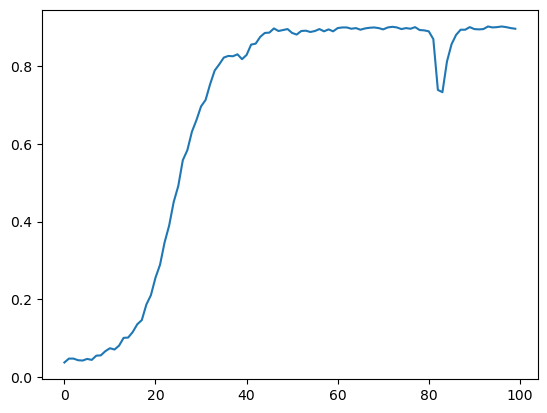

In [20]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])

In [ ]:
#step 6:output of model

In [21]:
from textblob import TextBlob
# Defining a function to take input of seed text from user and no. of words to be predicted

def predict_words(seed, no_words):
  for i in range(no_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=1)

    new_word = ''

    for word, index in tokenizer.word_index.items():
      if predicted == index:
        new_word = word
        break
    seed += " " + new_word
  print(seed)

# predicting or generating the poem with the seed text


seed_text = input("Input text: ")
next_words = 15
# incorrect spelling
print("original text: "+str(seed_text))
 
correct_text= TextBlob(seed_text)
 
# prints the corrected spelling
a="corrected text: "+str(correct_text.correct())
print(a)

print('Number of count:', seed_text.count('')) #count of text

new_text=predict_words(a, next_words)
print(new_text)

Input text: appple
original text: appple
corrected text: apple
Number of count: 7
1/1 [==============================] - 0s 90ms/step
corrected text: apple pay in cities for good trees like those bare bare fair caught fair fair fair
None
